# Cleaning And Analyzing Employee Exit Surveys

The data comes from surveys from the Department of Education, Training and Employment (DETE) and from the Technical and Further Education (TAFE) Institute in Queensland, Australia.

For this project, we'll assume the role of a data analyst attempting to answer the following questions for the stakeholders:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Though both surveys used the same template, one is customized. Since the intent is to use **both** data sets to answer these questions, some cleaning will be needed.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
%matplotlib inline

In [2]:
# read in the two surveys
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### Quick Data Overview

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

dete_survey is a 822 x 56 DataFrame while tafe_survey is a 702 x 72 DataFrame. Both surveys have missing data points. The nature of the data also vary between the two. dete_survey has mostly booleans and objects while tafe_survey is mostly objects, though a quick glance through tafe_survey shows Yes/No answers.

### Identify Missing Values and Drop Unnecessary Columns

In [7]:
# replacing string "Not Stated" with NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = "Not Stated")

In [8]:
# dropping columns not needed in the analysis from dete_survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [9]:
# dropping columns not needed in the analysis from tafe_survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

Since we're interested in two broad ideas (age and reasons for leaving), we'll only keep columns that tie to those.

For tafe_survey, this meant taking out columns 17 to 65 as those topics typically surrounds workplace environment, thoughts of the organization, etc. Keeping columns 0-16 and from 66-end means keeping topics directly applicable to contributing factors for leaving and age/length of service.

For dete_survey, the first 28 columns are related to an employees assessment of their working environment while the last 7 columns pertain to information around gender and age.

### Clean Column Names

In [10]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [11]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')

In [12]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
tafe_col_rename = {'Record ID' : 'id',
                  'CESSATION YEAR' : 'cease_date',
                  'Reason for ceasing employment' : 'separationtype',
                  'Gender. What is your Gender?' : 'gender',
                  'CurrentAge. Current Age' : 'age',
                  'Employment Type. Employment Type' : 'employment_status',
                  'Classification. Classification' : 'position',
                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'institute_service',
                  'LengthofServiceCurrent. Length of Service at current workplace (in years)' : 'role_service'}

In [14]:
tafe_survey_updated = tafe_survey_updated.rename(columns = tafe_col_rename)

In [15]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [16]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


There were a couple general things done to clean the columns names:
1. Put underscores in place of spaces.
2. Made the names all lowercase.

This was done to make the names more readable, shorter but retains the original meaning.

### Filtering the Data

In [17]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [19]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [20]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') |
                                        (dete_survey_updated['separationtype'] == 'Resignation-Other employer') |
                                         (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()

Keep in mind that one of the questions is around why employees are resigning, we'll need to filter 'separationtype' by resignations.

### Verifying the Data

In [21]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [22]:
pattern = r'(?P<cease_date>[1-2][0-9]{3})'

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern, expand = True).astype(float)

In [23]:
tafe_survey_updated['cease_date'].value_counts().sort_index(ascending = False)

2013.0     85
2012.0    235
2011.0    268
2010.0    103
2009.0      4
Name: cease_date, dtype: int64

In [24]:
dete_resignations['cease_date'].value_counts().sort_index(ascending = False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [25]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

While the 'cease_date' for tafe_resignations and 'dete_start_date' for dete_resignations were already in years (as float type), the 'cease_date' for dete_resignations needed cleaning. The values ranged from mm/yyyy to just yyyy - so we need to extract only the yyyy.

The 'age' columns for the two data sets also need cleaning.

### Create New Column To Compare Years Of Service

In [26]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [27]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


Since we need to compare if there is a trend between years of service and reason for resigning, we need to have the years of service in both DataFrame. tafe_resignations already has that column so we need to create that same one in dete_resignations.

### Identify Dissatisfied Employees

In [28]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [31]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [32]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)

In [33]:
dete_cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
            'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
            'work_location', 'employment_conditions', 'work_life_balance', 'workload']

dete_resignations['dissatisfied'] = dete_resignations[dete_cols].any(axis = 1, skipna = False)

In [34]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

What we did here was create a new column "dissatisfied" in both tafe_resignations and dete_resignation where if any of the column values were True, the new column will have True at the same index.

This way we created a "dissatisfied" column that is easily comparable instead of having to look through 11 columns.

### Combining The Two Datasets

In [35]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [36]:
# dete_resignations_up = dete_resignations_up.reset_index().drop(columns = 'index')

In [37]:
# tafe_resignations_up = tafe_resignations_up.reset_index().drop(columns = 'index')

In [64]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

C:\Users\curti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [68]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

In [69]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


We merged the two dataframes together into a single one called "combined". However, since we "outer" joined the two, there are columns that no longer have relevant data needed. After looking through the number of null values across columns, seems we can drop columns with less than 500 non-null values and still retain columns we're interested in.

### Clean the Service Column

Next, we'll clean the institute_service column and categorize employees according to the following definitions:

* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace


In [71]:
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [74]:
# extract years of service
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')

In [75]:
# change to float
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)

In [78]:
# check the results
combined_updated['institute_service_up'].value_counts(dropna = False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [83]:
# defined a function that categorizes years of service into buckets
def year_match(val):
    if val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan

In [80]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(year_match)

In [82]:
combined_updated['service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Grouping the years of service reduces that need to look at so many variations. By reducing the number of "categories" to 4-5 groups, we can easily see relationships between the experience level and dissatisfaction.

### Perform Initial Analysis

Now it's time to do the initial analysis! We'll start by filling in missing values for the "dissatisfied" column then aggregating the data.

In [84]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [86]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(True)

In [91]:
dis_count = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')
dis_count

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


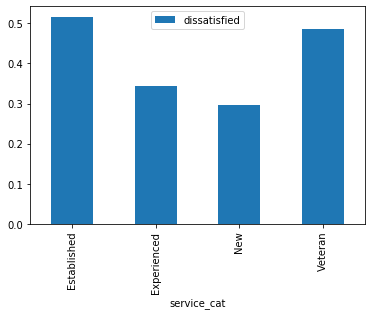

In [92]:
dis_count.plot(kind = 'bar')

This chart suggests that of the employees that resigned, nearly 50% comes from reasons of being dissatisfied. New and Experienced employees have a lower chance of resigning from dissatisfaction.

### Additional Steps

Since the focus of this project is around data cleaning, the analysis part is merely introductory. However, some parting thoughts on what else could be done:
1. Handle the rest of the missing values and re-aggregate on the 'service_cat' column again. How many people in each career stage resigned due to some kind of dissatisfaction?
2. Clean the 'age' column. Can we draw conclusions between age groups and resignations from dissatisfaction?
3. Keep the DETE and TAFE survey results separate. How do the findings change?